#Generate a .CSV file of 5 dimensions, analyse it statistically,split it for testing and training. Test with the following algorithms:
* Linear Regression
* Logistic Regression
* SVM
* K-means Clustering
* KNN
* PCA 
* Naive Bayes & AdaBoost Classifier
* Visualise your results using a suitable plot.


In [2]:
import csv
import numpy as np
import pandas as pd
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn. preprocessing import Binarizer 
from sklearn.decomposition import PCA

In [7]:
from google.colab import files
uploaded = files.upload()

Saving My_Data.csv to My_Data.csv


In [9]:
# reading the data
data = pd.read_csv("My_Data.csv")

In [10]:
#1. Find the dimension, datatype and do the statistical analysis of the data loaded
 
print(data.shape)
print(data.dtypes)  
print(data. describe())

(574, 5)
PCE         float64
POP           int64
PSAVERT     float64
UEMPMED     float64
UNEMPLOY      int64
dtype: object
               PCE            POP     PSAVERT     UEMPMED      UNEMPLOY
count   574.000000     574.000000  574.000000  574.000000    574.000000
mean   3005.596864  217196.233449    9.389895    8.608711   5439.073171
std    2605.283154   33790.951994    2.838221    4.106645   2499.779413
min     306.100000  156309.000000    2.200000    4.000000   1596.000000
25%     668.225000  190521.000000    7.025000    6.000000   3197.250000
50%    2155.450000  216851.000000   10.100000    7.500000   4895.500000
75%    4822.425000  243590.750000   11.600000    9.100000   7566.750000
max    9373.200000  280203.000000   17.300000   25.200000  12051.000000


In [11]:
#2.	Scale and binarize the data.
 
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn. preprocessing import Binarizer 
array= data.values
data_scaler = preprocessing. MinMaxScaler (feature_range= (0,1)) 
data_rescaled = data_scaler.fit_transform(array)
set_printoptions(precision=1) 
print ("\nScaled data:\n", data_rescaled[0:2])
binarizer = Binarizer(threshold=0.5).fit(array) 
Data_binarized = binarizer.transform(array)
print ("\nBinary data:\n", Data_binarized [0:2])


Scaled data:
 [[0.0e+00 0.0e+00 6.0e-01 2.4e-02 4.2e-02]
 [3.9e-04 1.8e-03 5.6e-01 3.3e-02 7.0e-02]]

Binary data:
 [[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [12]:
from sklearn.decomposition import PCA
array= data.values
X = array[:,0:4] 
Y = array[:,3]
pca = PCA(n_components = 2) 
fit = pca.fit(X) 
print("Explained Variance: %s")
print(fit.components_)

Explained Variance: %s
[[ 7.3e-02  1.0e+00 -6.9e-05  8.5e-05]
 [ 1.0e+00 -7.3e-02 -1.5e-03  1.6e-03]]


In [13]:
#Loading the Required Libraries and Modules
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
#Reading the Data and Performing Basic Data Checks
df = pd.read_csv('My_Data.csv') 
print(df.shape)
df.describe()

(574, 5)


,PCE,POP,PSAVERT,UEMPMED,UNEMPLOY
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,3005.596864,217196.233449,9.389895,8.608711,5439.073171
std,2605.283154,33790.951994,2.838221,4.106645,2499.779413
min,306.100000,156309.000000,2.200000,4.000000,1596.000000
25%,668.225000,190521.000000,7.025000,6.000000,3197.250000
50%,2155.450000,216851.000000,10.100000,7.500000,4895.500000
75%,4822.425000,243590.750000,11.600000,9.100000,7566.750000
max,9373.200000,280203.000000,17.300000,25.200000,12051.000000


In [14]:
#Creating Arrays for the Features and the Response Variable
target_column = ['UEMPMED'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,PCE,POP,PSAVERT,UEMPMED,UNEMPLOY
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,0.320659,0.775139,0.542769,8.608711,0.451338
std,0.277950,0.120595,0.164059,4.106645,0.207433
min,0.032657,0.557842,0.127168,4.000000,0.132437
25%,0.071291,0.679939,0.406069,6.000000,0.265310
50%,0.229959,0.773907,0.583815,7.500000,0.406232
75%,0.514491,0.869337,0.670520,9.100000,0.627894
max,1.000000,1.000000,1.000000,25.200000,1.000000


In [15]:
#Creating the Training and Test Datasets
X = df[predictors].values
y = df[target_column].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); 
print(X_test.shape)

(401, 4)
(173, 4)


#Linear Regression

In [16]:
# Build, Predict and Evaluate the Regression Model
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
 #Once the model is built on the training set, we can make the predictions.
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
 
pred_test_lr= lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr)))

2.5931957023216925
2.402254366592421


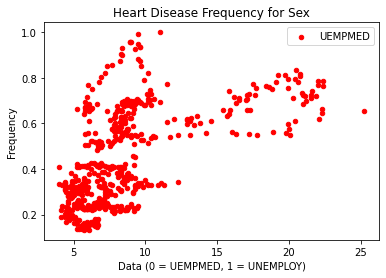

In [18]:
df.plot(kind='scatter',x='UEMPMED',y='UNEMPLOY',color='red')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Data (0 = UEMPMED, 1 = UNEMPLOY)')
plt.xticks(rotation=0)
plt.legend(["UEMPMED", "UNEMPLOY"])
plt.ylabel('Frequency')
plt.show()

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Logistic Regression

In [40]:
#Creating Model for Logistic Regression
y = df.UEMPMED.values
x_data = df.drop(['UEMPMED'], axis = 1)
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
#We will split our data. 80% of our data will be train data and 20% of it will be test data.
 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
 
#using Logistic Regression
accuracies = {}
 
lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100
 
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))
#using Support Vector Machine (SVM)
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)
 
acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

#K-MEANS CLUSTERING

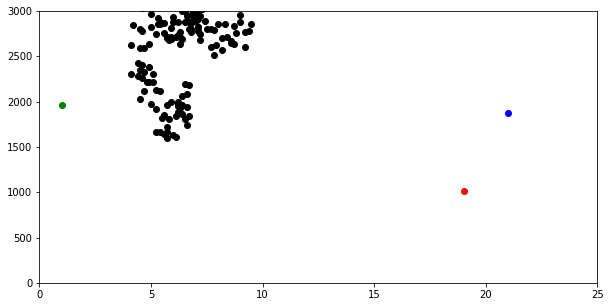

In [21]:
## Initialisation
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
df = pd.read_csv('My_Data.csv')
np.random.seed(3000)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 25), np.random.randint(0, 3000)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(10, 5))
plt.scatter(df['UEMPMED'], df['UNEMPLOY'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 25)
plt.ylim(0, 3000)
plt.show()

In [22]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['UEMPMED'] - centroids[i][0]) ** 2
                + (df['UNEMPLOY'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))      
    df['color'] = df['closest'].map(lambda x: colmap[x])     
    return df
 
df = assignment(df, centroids)
print(df.head())

     PCE     POP  PSAVERT  ...  distance_from_3  closest  color
0  306.1  156309     11.3  ...       158.859214        2      g
1  309.6  156527     10.6  ...       452.293809        2      g
2  312.7  156731     10.3  ...       523.257069        2      g
3  312.2  156943     11.2  ...       510.254064        2      g
4  316.1  157140     10.6  ...       242.548325        2      g

[5 rows x 10 columns]


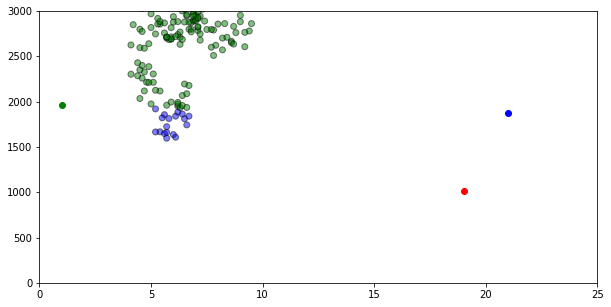

In [23]:
fig = plt.figure(figsize=(10, 5))
plt.scatter(df['UEMPMED'], df['UNEMPLOY'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 25)
plt.ylim(0, 3000)
plt.show()

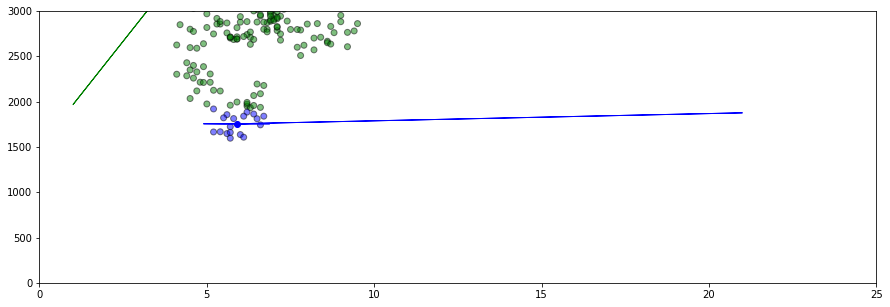

In [24]:
## Update Stage
 
import copy
 
old_centroids = copy.deepcopy(centroids)
 
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['UEMPMED'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['UNEMPLOY'])
    return k
 
centroids = update(centroids)
    
fig = plt.figure(figsize=(15, 5))
ax = plt.axes()
plt.scatter(df['UEMPMED'], df['UNEMPLOY'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 25)
plt.ylim(0, 3000)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0])
    dy = (centroids[i][1] - old_centroids[i][1])
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


Size: (574, 5)
               PCE            POP     PSAVERT     UEMPMED      UNEMPLOY
count   574.000000     574.000000  574.000000  574.000000    574.000000
mean   3005.596864  217196.233449    9.389895    8.608711   5439.073171
std    2605.283154   33790.951994    2.838221    4.106645   2499.779413
min     306.100000  156309.000000    2.200000    4.000000   1596.000000
25%     668.225000  190521.000000    7.025000    6.000000   3197.250000
50%    2155.450000  216851.000000   10.100000    7.500000   4895.500000
75%    4822.425000  243590.750000   11.600000    9.100000   7566.750000
max    9373.200000  280203.000000   17.300000   25.200000  12051.000000


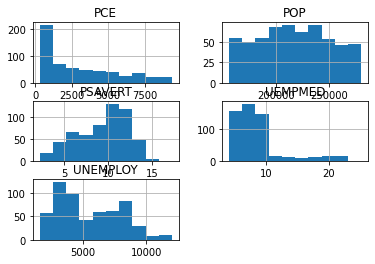

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
diabetes_df = pd.read_csv('My_Data.csv')
names = ["PCE","POP","PSAVERT","UEMPMED",	"UNEMPLOY"]
diabetes_df.columns = names
diabetes_df.head()
diabetes_df['UEMPMED'][diabetes_df['UNEMPLOY'] == 'positive'] = 1
diabetes_df['UEMPMED'][diabetes_df['UNEMPLOY'] == 'negative'] = 0
diabetes_df.head()
print("Size: {}".format(diabetes_df.shape))
print(diabetes_df.describe())
diabetes_df.hist()
plt.show()

#KNN & SVM

In [26]:
X = diabetes_df.iloc[:,0:4]
y = diabetes_df.iloc[:,4]
y = y.astype('int')
#Split into train and test set using sklearn model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#The next step is to import the libraries and build a list with our models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Let’s evaluate the estimators performance
#seed=7
#scoring='accuracy'
results = []
names = []
Seed=7
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10,random_state=Seed) 
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.000000 (0.000000)
LDA: 0.000000 (0.000000)
KNN: 0.002174 (0.006522)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.004348 (0.008696)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.000000 (0.000000)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.000000 (0.000000)


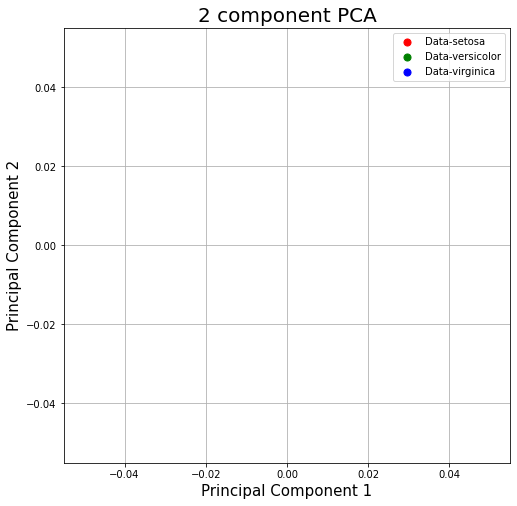

In [37]:
#Load Iris Dataset
#The Iris dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the iris dataset.
import pandas as pd
# load dataset into Pandas DataFrame
df = pd.read_csv('My_Data.csv')
df
names = ["PCE","POP","PSAVERT","UEMPMED",	"UNEMPLOY"]
from sklearn.preprocessing import StandardScaler
features = ["PCE","POP","PSAVERT","UEMPMED",	"UNEMPLOY"]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['UNEMPLOY']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
 
 
finalDf = pd.concat([principalDf, df[['UNEMPLOY']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Data-setosa', 'Data-versicolor', 'Data-virginica']
colors = ['r', 'g', 'b']
for UNEMPLOY, color in zip(targets,colors):
    indicesToKeep = finalDf['UNEMPLOY'] == UNEMPLOY
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
